In [1]:
from rubin_scheduler.scheduler.example import example_scheduler
import numpy as np
import healpy as hp

from rubin_scheduler.scheduler.utils import SimTargetooServer, TargetoO
from rubin_scheduler.scheduler.model_observatory import ModelObservatory

from rubin_scheduler.scheduler import sim_runner

import matplotlib.pylab as plt
%matplotlib inline

In [2]:
# load up the example scheduler, which has ToO surveys included by default
scheduler = example_scheduler()

/Users/yoachim/git_repos/rubin_scheduler/rubin_scheduler/scheduler/surveys/base_survey.py:545: FutureWarning: setting dither to bool deprecated, swapping to dither='night'
  warnings.warn("setting dither to bool deprecated, swapping to dither='night'", FutureWarning)


Optimizing ELAISS1
Optimizing XMM_LSS
Optimizing ECDFS
Optimizing COSMOS
Optimizing EDFS_a


/Users/yoachim/git_repos/rubin_scheduler/rubin_scheduler/scheduler/surveys/roman_surveys.py:44: UserWarning: Generating Roman survey place holder. Should probably not be in production.
  warnings.warn("Generating Roman survey place holder. Should probably not be in production.")
/Users/yoachim/git_repos/rubin_scheduler/rubin_scheduler/scheduler/surveys/roman_surveys.py:100: UserWarning: Generating Roman survey place holder. Should probably not be in production.
  warnings.warn("Generating Roman survey place holder. Should probably not be in production.")
/Users/yoachim/anaconda3/envs/rubin12/lib/python3.12/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "utctai" yielded 463 of "dubious year (Note 3)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/Users/yoachim/anaconda3/envs/rubin12/lib/python3.12/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "taiutc" yielded 463 of "dubious year (Note 4)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}'

In [3]:
nside = 32
observatory = ModelObservatory(nside=nside,)# sim_to_o=sim_to_o)

In [4]:
# Make a ToO event

# Make a healpix map, can be any nside
footprint = np.zeros(hp.nside2npix(16))
# Set some healpix near the pole to be where to observe
footprint[-8:] = 1

# Set the event to go off at the start of the survey
event_start = observatory.mjd
duration = 20 # Days

# Need to set a nominal center for the event
# could just take mean of RA,dec HEALpix map I suppose
ra_deg = 0.
dec_deg = -90.

# ToO type. Should probabably document the 
# options for this somewhere.
too_type = "lensed_BNS_case_A" 

# Unique int ID for each event
target_id = 100

event = TargetoO(
                target_id,
                footprint,
                event_start,
                duration,
                ra_rad_center=np.radians(ra_deg),
                dec_rad_center=np.radians(dec_deg),
                too_type=too_type)
# Thing to pass to the ModelObservatory so it will send out
# the ToO alert in the Conditions object
sim_to_o = SimTargetooServer([event])


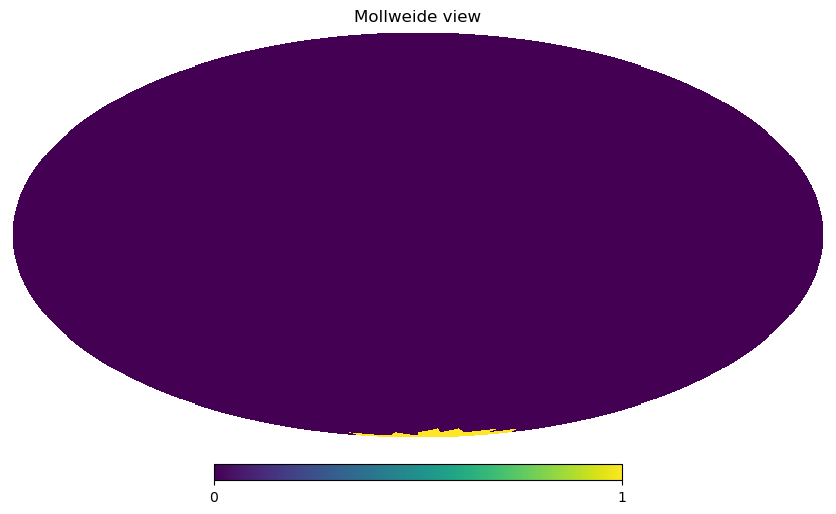

In [5]:
# here's what the target footprint looks like:
hp.mollview(footprint)

In [6]:
# model observatory with the ToO ready to go
observatory = ModelObservatory(nside=nside, sim_to_o=sim_to_o)

In [7]:
# simulate for 2 days
observatory, scheduler, observations = sim_runner(
        observatory,
        scheduler,
        sim_duration=2,
        filename=None,
        verbose=True,
    )

progress = 6.29%

/Users/yoachim/git_repos/rubin_scheduler/rubin_scheduler/utils/healpy_utils.py:339: RuntimeWarning: All-NaN slice encountered
  indx = np.where(in_map[current_neighbors] == np.nanmax(in_map[current_neighbors]))[0]
/Users/yoachim/git_repos/rubin_scheduler/rubin_scheduler/utils/healpy_utils.py:342: UserWarning: Can not connect to any more pixels.
  warnings.warn("Can not connect to any more pixels.")


progress = 50.03%

/Users/yoachim/git_repos/rubin_scheduler/rubin_scheduler/skybrightness_pre/sky_model_pre.py:359: UserWarning: Requested MJD between sunrise and sunset, returning closest maps
  warnings.warn("Requested MJD between sunrise and sunset, returning closest maps")


progress = 500.33%Skipped 0 observations
Flushed 0 observations from queue for being stale
Completed 1191 observations
ran in 0 min = 0.0 hours


In [8]:
# Did we execute some ToO observaitons?
np.unique(observations["scheduler_note"])

array(['ToO, LensedBNS_A, 100_t1_i0, 1',
       'ToO, LensedBNS_A, 100_t1_i0, 12',
       'ToO, LensedBNS_A, 100_t1_i0, 13',
       'ToO, LensedBNS_A, 100_t1_i0, 14',
       'ToO, LensedBNS_A, 100_t1_i0, 15',
       'ToO, LensedBNS_A, 100_t1_i0, 16',
       'ToO, LensedBNS_A, 100_t1_i0, 17',
       'ToO, LensedBNS_A, 100_t1_i0, 2', 'ToO, LensedBNS_A, 100_t1_i0, 3',
       'ToO, LensedBNS_A, 100_t1_i0, 4', 'ToO, LensedBNS_A, 100_t1_i0, 5',
       'ToO, LensedBNS_A, 100_t1_i1, 18',
       'ToO, LensedBNS_A, 100_t1_i1, 19',
       'ToO, LensedBNS_A, 100_t1_i1, 20',
       'ToO, LensedBNS_A, 100_t1_i1, 21',
       'ToO, LensedBNS_A, 100_t1_i1, 22',
       'ToO, LensedBNS_A, 100_t1_i1, 29',
       'ToO, LensedBNS_A, 100_t1_i1, 30',
       'ToO, LensedBNS_A, 100_t1_i1, 31',
       'ToO, LensedBNS_A, 100_t1_i1, 32',
       'ToO, LensedBNS_A, 100_t1_i1, 33',
       'ToO, LensedBNS_A, 100_t1_i1, 34', 'blob_long, gr, a',
       'blob_long, gr, b', 'greedy', 'long, 1', 'long, 10', 'long, 11',
   

Text(0.5, 1.0, 'ToO observations')

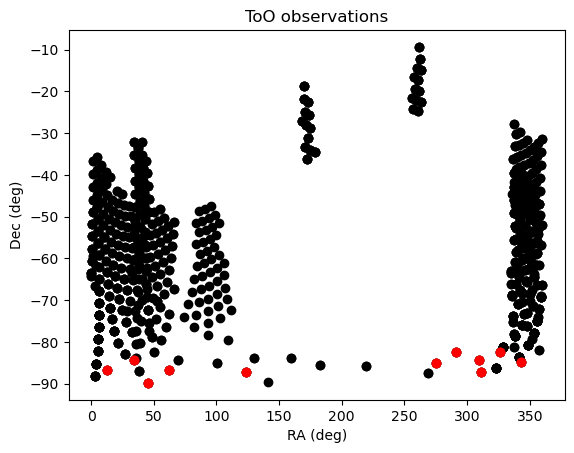

In [9]:
# Check that ToO events are where we think they should be
too_indx = ["ToO" in note for note in observations["scheduler_note"]]

fig, ax = plt.subplots()


ax.scatter(np.degrees(observations["RA"]), np.degrees(observations["dec"]), color='black')

ax.scatter(np.degrees(observations["RA"][too_indx]), np.degrees(observations["dec"][too_indx]), color="red")
ax.set_xlabel("RA (deg)")
ax.set_ylabel("Dec (deg)")
ax.set_title("ToO observations")